In [3]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import pandas as pd
%matplotlib inline

In [4]:
class GaussianGenerativeModel:
    def __init__(self, isSharedCovariance=False):
        self.isSharedCovariance = isSharedCovariance
        self.sigma1 = None
        self.sigma2 = None
        self.sigma3 = None
        self.mu1 = None
        self.mu2 = None
        self.mu3 = None

    
    def __fruit_data(self):
        self.fruit = pd.read_csv("fruit.csv")
        self.X = self.fruit[["width","height"]]
        self.y = self.fruit["fruit"]

    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        c1 = X[Y==0]
        c2 = X[Y==1]
        c3 = X[Y==2]
        self.mu1 = np.mean(c1,axis=0)
        self.mu2 = np.mean(c2,axis=0)
        self.mu3 = np.mean(c3,axis=0)
        if self.isSharedCovariance:
            self.sigma1 = np.cov(X.transpose())
            self.sigma2 = np.cov(X.transpose())
            self.sigma3 = np.cov(X.transpose())
        else:
            self.sigma1 = np.cov(c1.transpose())
            self.sigma2 = np.cov(c2.transpose())
            self.sigma3 = np.cov(c3.transpose())
        return self
    
    
    def predict(self, X_to_predict):

        #p1 =[]; p2=[]; p3=[]
        #pred_x = pd.DataFrame(X_to_predict)
        #for x in pred_x.iterrows():
        p1 = multivariate_normal.pdf(X_to_predict, mean=self.mu1, cov=self.sigma1)
        p2 = multivariate_normal.pdf(X_to_predict, mean=self.mu2, cov=self.sigma2)
        p3 = multivariate_normal.pdf(X_to_predict, mean=self.mu3, cov=self.sigma3)
        preds = pd.DataFrame({"Class 1":p1, "Class 2": p2, "Class 3": p3})
               
        return np.argmax(np.array(preds),axis=1) 
    
    

    # Do not modify this method!
    def visualize(self, output_file, width=3, show_charts=True):
        X = self.X

        # Create a grid of points
        x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
        y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
        xx,yy = np.meshgrid(np.arange(x_min, x_max, .005), np.arange(y_min,
            y_max, .005))

        # Flatten the grid so the values match spec for self.predict
        xx_flat = xx.flatten()
        yy_flat = yy.flatten()
        X_topredict = np.vstack((xx_flat,yy_flat)).T

        # Get the class predictions
        Y_hat = self.predict(X_topredict)
        Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))

        cMap = c.ListedColormap(['r','b','g'])

        # Visualize them.
        plt.figure()
        #plt.pcolormesh(xx,yy,Y_hat, cmap=cMap)
        plt.scatter(X[:, 0], X[:, 1], c=self.Y, cmap=cMap)
        #plt.savefig(output_file)
        if show_charts:
            plt.show()


<__main__.GaussianGenerativeModel instance at 0x109db8ea8>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


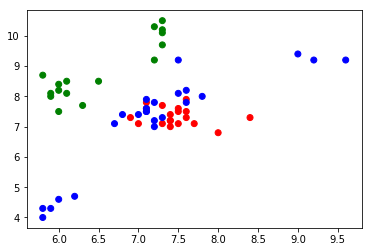

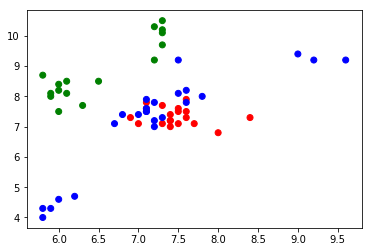

NameError: name 'LogisticRegression' is not defined

In [6]:
eta = .01
lambda_parameter = 10


# Do not change anything below this line!!
# -----------------------------------------------------------------

# Read from file and extract X and Y
df = pd.read_csv("fruit.csv")
X = df[['width', 'height']].values
Y = (df['fruit'] - 1).values

nb1 = GaussianGenerativeModel(isSharedCovariance=False)
print nb1.fit(X,Y)
print nb1.predict(X)
nb1.visualize("generative_result_separate_covariances.png")

nb2 = GaussianGenerativeModel(isSharedCovariance=True)
nb2.fit(X,Y)
nb2.visualize("generative_result_shared_covariances.png")

lr = LogisticRegression(eta=eta, lambda_parameter=lambda_parameter)
lr.fit(X,Y)
lr.visualize('logistic_regression_result.png')

[[ 8.4  7.3]
 [ 8.   6.8]
 [ 7.4  7.2]
 [ 7.1  7.8]
 [ 7.4  7. ]
 [ 6.9  7.3]
 [ 7.1  7.6]
 [ 7.   7.1]
 [ 7.3  7.7]
 [ 7.6  7.3]
 [ 7.7  7.1]
 [ 7.6  7.5]
 [ 7.5  7.6]
 [ 7.5  7.1]
 [ 7.4  7.2]
 [ 7.5  7.5]
 [ 7.4  7.4]
 [ 7.3  7.1]
 [ 7.6  7.9]]
(19, 2)
(59,)


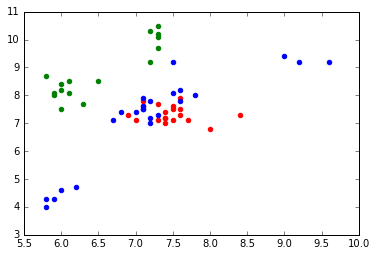

In [64]:
c1 = X[Y==0]
c2 = X[Y==1]
c3 = X[Y==2]
print c1
print c1.shape
print Y.shape
plt.scatter(c1[:,0],c1[:,1],color="red")
plt.scatter(c2[:,0],c2[:,1],color="blue")
plt.scatter(c3[:,0],c3[:,1],color="green")